# Data Import

In [1]:
# Importing required libraries/modules..
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import data_cleaning as dc
import data_visualizations as dv



In [2]:
# Reading/Loading the data from csv.
titanic = pd.read_csv("train.csv")

# Exploring and Understanding the Imported data

In [3]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Initial Observations

###### (1). This data set contains 891 Rows & 12 Columns.
###### (2). The 'Name' column contains the full name including the Salutation. The Last Name is placed first.
###### (3). There are few null values in 'Age'  and 'Cabin' column.The  type of 'Age' column is 'float' and 'Cabin' is of type object.
###### (4). The 'Survived' column stores one of the two values (0 or 1). The type of this column is 'integer'.
###### (5). The SibSp & Parch column stores the information whether passenger is travelling alone or not.
###### (6). The Pclass stores the information of  the class of the passenger. It has 3 possible values .. 1,2 or 3.

# Questions:

###### (1).   Count of Male & Female passengers .
###### (2).   Count of Adults & Kids   passengers.
###### (3).   Count of Male & Female died passengers.
###### (4).   Count of Male & Female survived passengers
###### (5).   Age Group of died Male  passengers .
###### (6).   Age Group of died Female  passengers .
###### (7).   Age Group of survived Male  passengers .
###### (8).   Age Group of survived Female  passengers .
###### (9).   Passenger Class wise count of passengers.
###### (10). Passenger Class wise count of died passengers.
###### (11). Passenger Class wise count of survived passengers.
###### (12). Conclusion on any pattern which can help in Predictive Analysis.


## Suggestions:


In [5]:
# In the context of questions listed above there are few changes required in the raw data.
# Suggested changes are listed below.
# 1. "Survived" column is int64. Convert it as "category".
# 2. "Pclass" column is int64. Convert it as "category".
# 3. "Ticket","Fare","Cabin", & "Embarked" columns can be safely removed.
# 4. Update the values of "Survived" column. Replace 0 by "Dead" and 1 by "Alive".
# 5. Add a new column "Age Group" to classify a passenger into group based on his/her age.
# 6. Add a new column "Status" to classify a passenger as an "Adult or "Kid".
# 7. Add a new colum "Travelling" to classify whether a passenger is travelling "Alone" or "Family". The values of this column,
#    will be based on the values in SibSp and Parch columns. If both are having value as 0 then passenger is travelling Alone.
# 8. Add a new column "Salutation" and place the First Name at first place in "Name" column.

# Data Cleaning & Wrangling.

# Implementing the changes listed in "Suggestions".

    

In [6]:
# Created a single Function to convert 'raw' data..
titanic_clean = dc.update_raw_data(titanic)

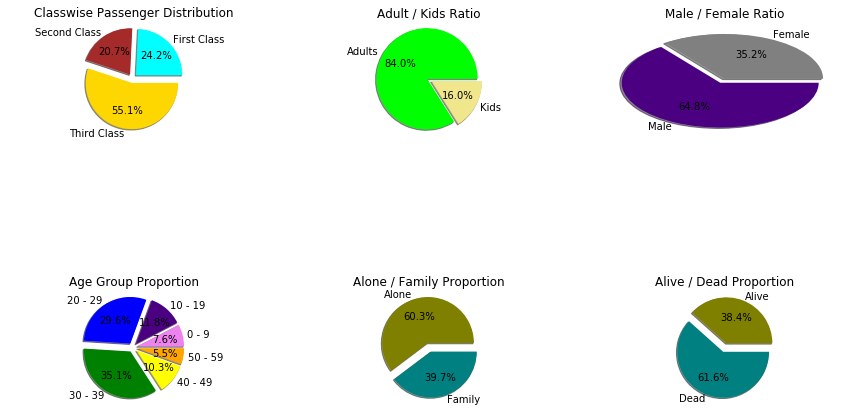

In [7]:
# Pie chart to visualize the details of All passengers..
dv.plot_pie("Complete",titanic_clean)

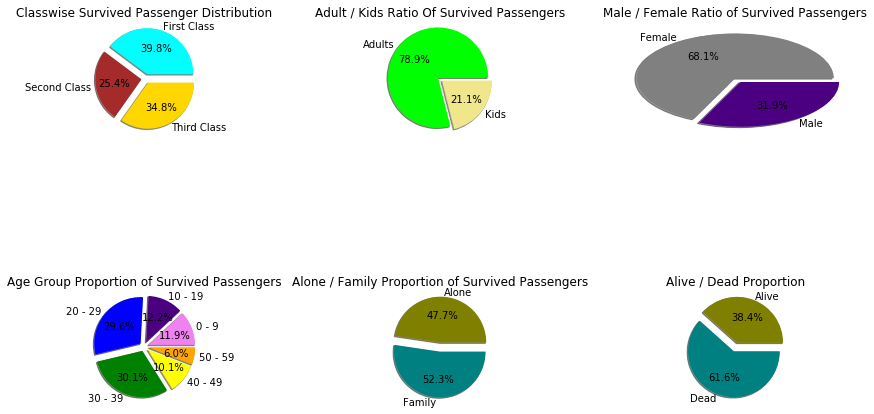

In [8]:
# Pie chart to visualize the details of Survived passengers..
dv.plot_pie("Alive",titanic_clean)

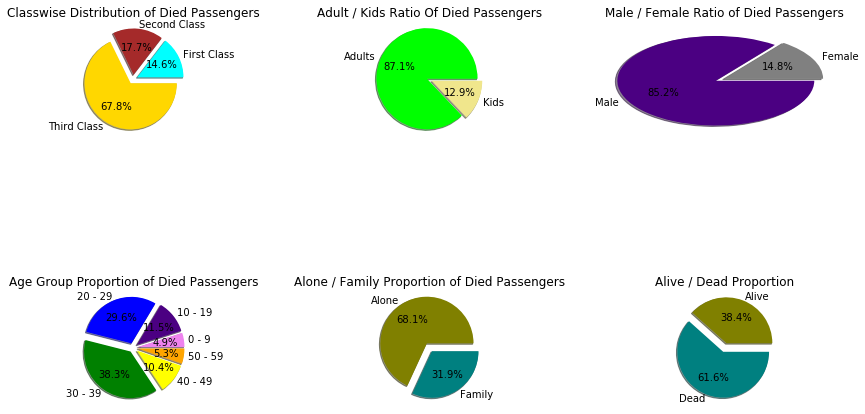

In [9]:
# Pie chart to visualize the details of Died passengers..
dv.plot_pie("Dead",titanic_clean)

In [10]:
surv_rate = titanic.groupby("Sex")["Survived"].mean() * 100

[(0, 100),

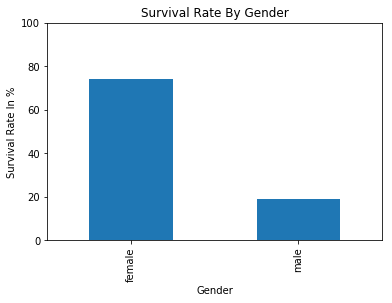

In [11]:
ax = surv_rate.plot.bar()
ax.set(title='Survival Rate By Gender',
       xlabel='Gender',
       ylabel='Survival Rate In %',
       ylim=[0,100])
       
       

# Conclusion

##### (1). Females are more likely to survived. 

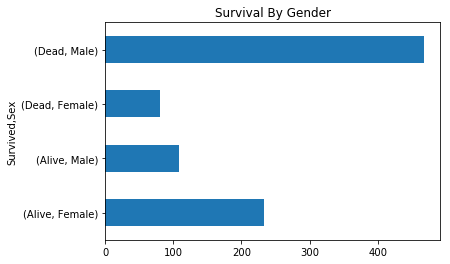

In [12]:
titanic_clean[["Survived","Sex","Age Group","Pclass","General"]].groupby(['Survived','Sex'])["Pclass"].count().plot.barh(title="Survival By Gender")

##### The above "Survival By Gender" graph shows the count of Male and Female for both dead and alive .

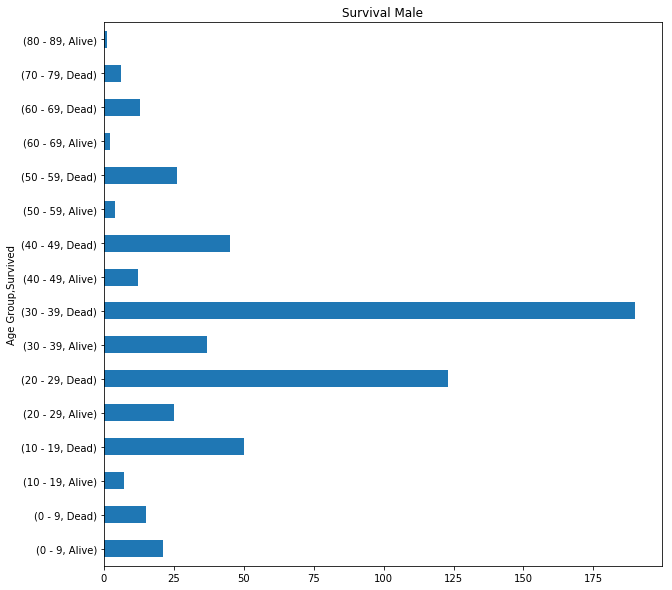

In [13]:
(titanic_clean[(titanic_clean.Sex == "Male")][["Survived","Age Group","Pclass","General"]]).groupby(['Age Group','Survived'])["Pclass"].count().plot.barh(title="Survival Male",
figsize=(10,10))

##### The above graph "Survival Male" shows the maximum number of dead Males were in Age Group of 30 - 39

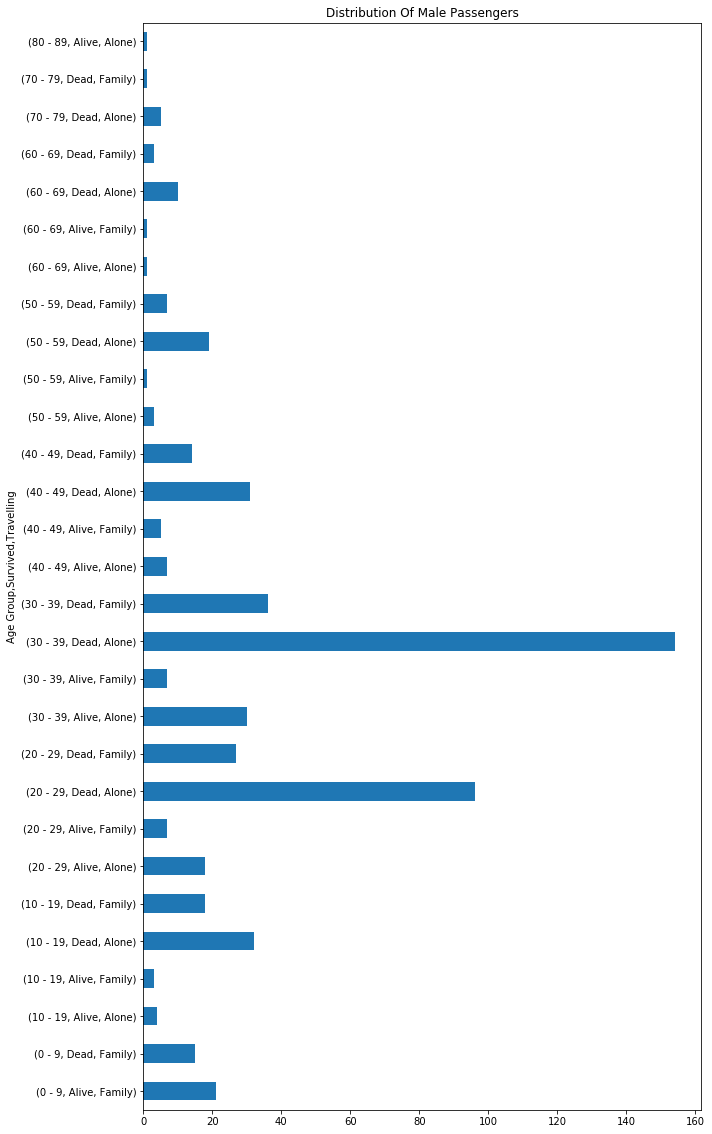

In [14]:
(titanic_clean[(titanic_clean.Sex == "Male")][["Survived","Age Group","Pclass","Travelling"]]).groupby(['Age Group','Survived','Travelling'])["Pclass"].count().plot.barh(title="Distribution Of Male Passengers",
figsize=(10,20))

##### The above graph "Distribution Of Male Passengers" shows that the maximum number of Males who died were travelling alone and were in ##### Age Group 30 -39. 

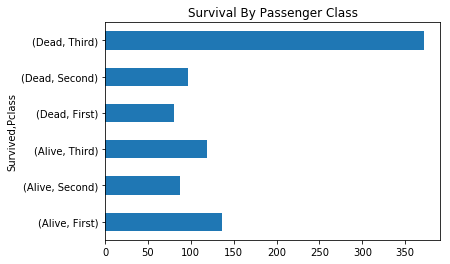

In [15]:
titanic_clean[["Survived","Sex","Age Group","Pclass","General"]].groupby(['Survived','Pclass'])["General"].count().plot.barh(title="Survival By Passenger Class")

##### The above graph "Survival By Passenger Class" shows that the maximum dead passengers were from Third Class.

### Conclusion on any pattern which can help in Predictive Analysis.

#### Based on the above charts & figures we can observe a pattern/ relation . 
#### " If a Male passenger between 30 - 39 Age  is travelling Alone in Third Class he is not likely to survive.

# Next Steps..?

In [16]:
# Nex I Would like to perform regression model on the cleaned data to understand if there is any other attribute which can impact the 
# survival of a passenger.